In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.shape

(205, 26)

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df_dup=df.duplicated().any()
df_dup

False

In [9]:
for col in df.columns:
    print(col, ":",df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

car_ID : 205
1      1
142    1
132    1
133    1
134    1
Name: car_ID, dtype: int64

********************

symboling : 6
 0    67
 1    54
 2    32
 3    27
-1    22
Name: symboling, dtype: int64

********************

CarName : 147
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
Name: CarName, dtype: int64

********************

fueltype : 2
gas       185
diesel     20
Name: fueltype, dtype: int64

********************

aspiration : 2
std      168
turbo     37
Name: aspiration, dtype: int64

********************

doornumber : 2
four    115
two      90
Name: doornumber, dtype: int64

********************

carbody : 5
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

********************

drivewheel : 3
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

********************

enginelocation : 2
front    202
rear       3
Name

In [10]:
string_columns=list(df.dtypes[df.dtypes=='object'].index)
for col in string_columns:
    df[col]=df[col].str.lower().str.replace(' ','_')
    df[col]=df[col].str.lower().str.replace('-','_')

<AxesSubplot:xlabel='price', ylabel='Count'>

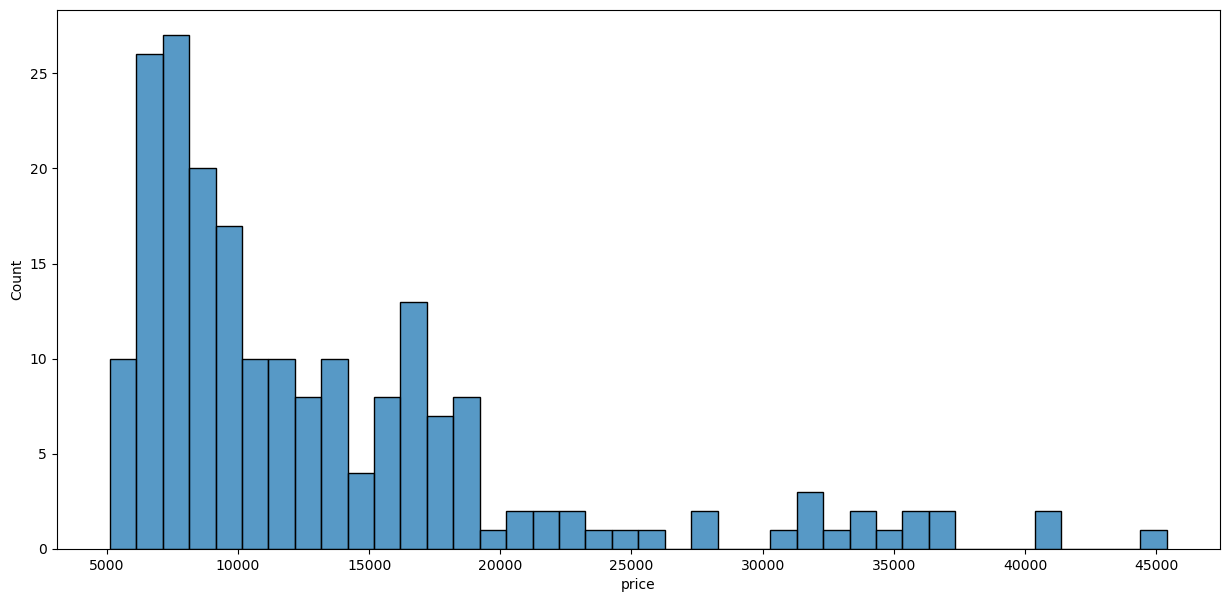

In [11]:
plt.figure(figsize=(15,7))
sns.histplot(df.price,bins=40)

In [12]:
df.price.skew()

1.7776781560914454

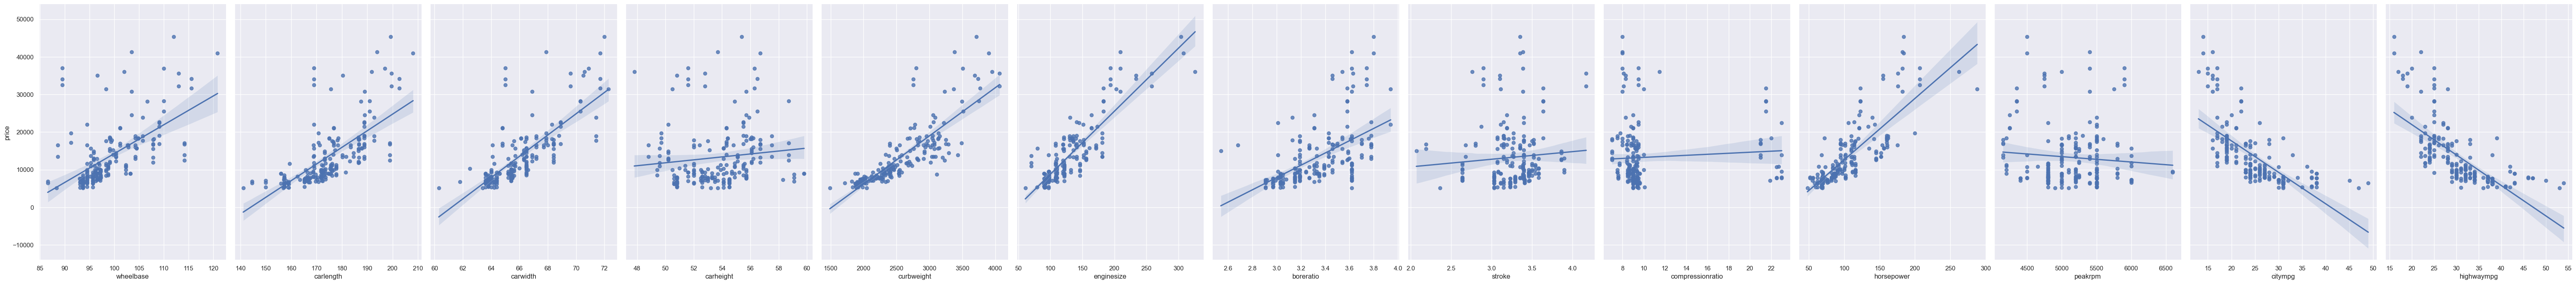

In [13]:
sns.set()
sns.pairplot(df, x_vars=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'], y_vars=['price'], height=7, aspect=0.7, kind='reg')
plt.show()

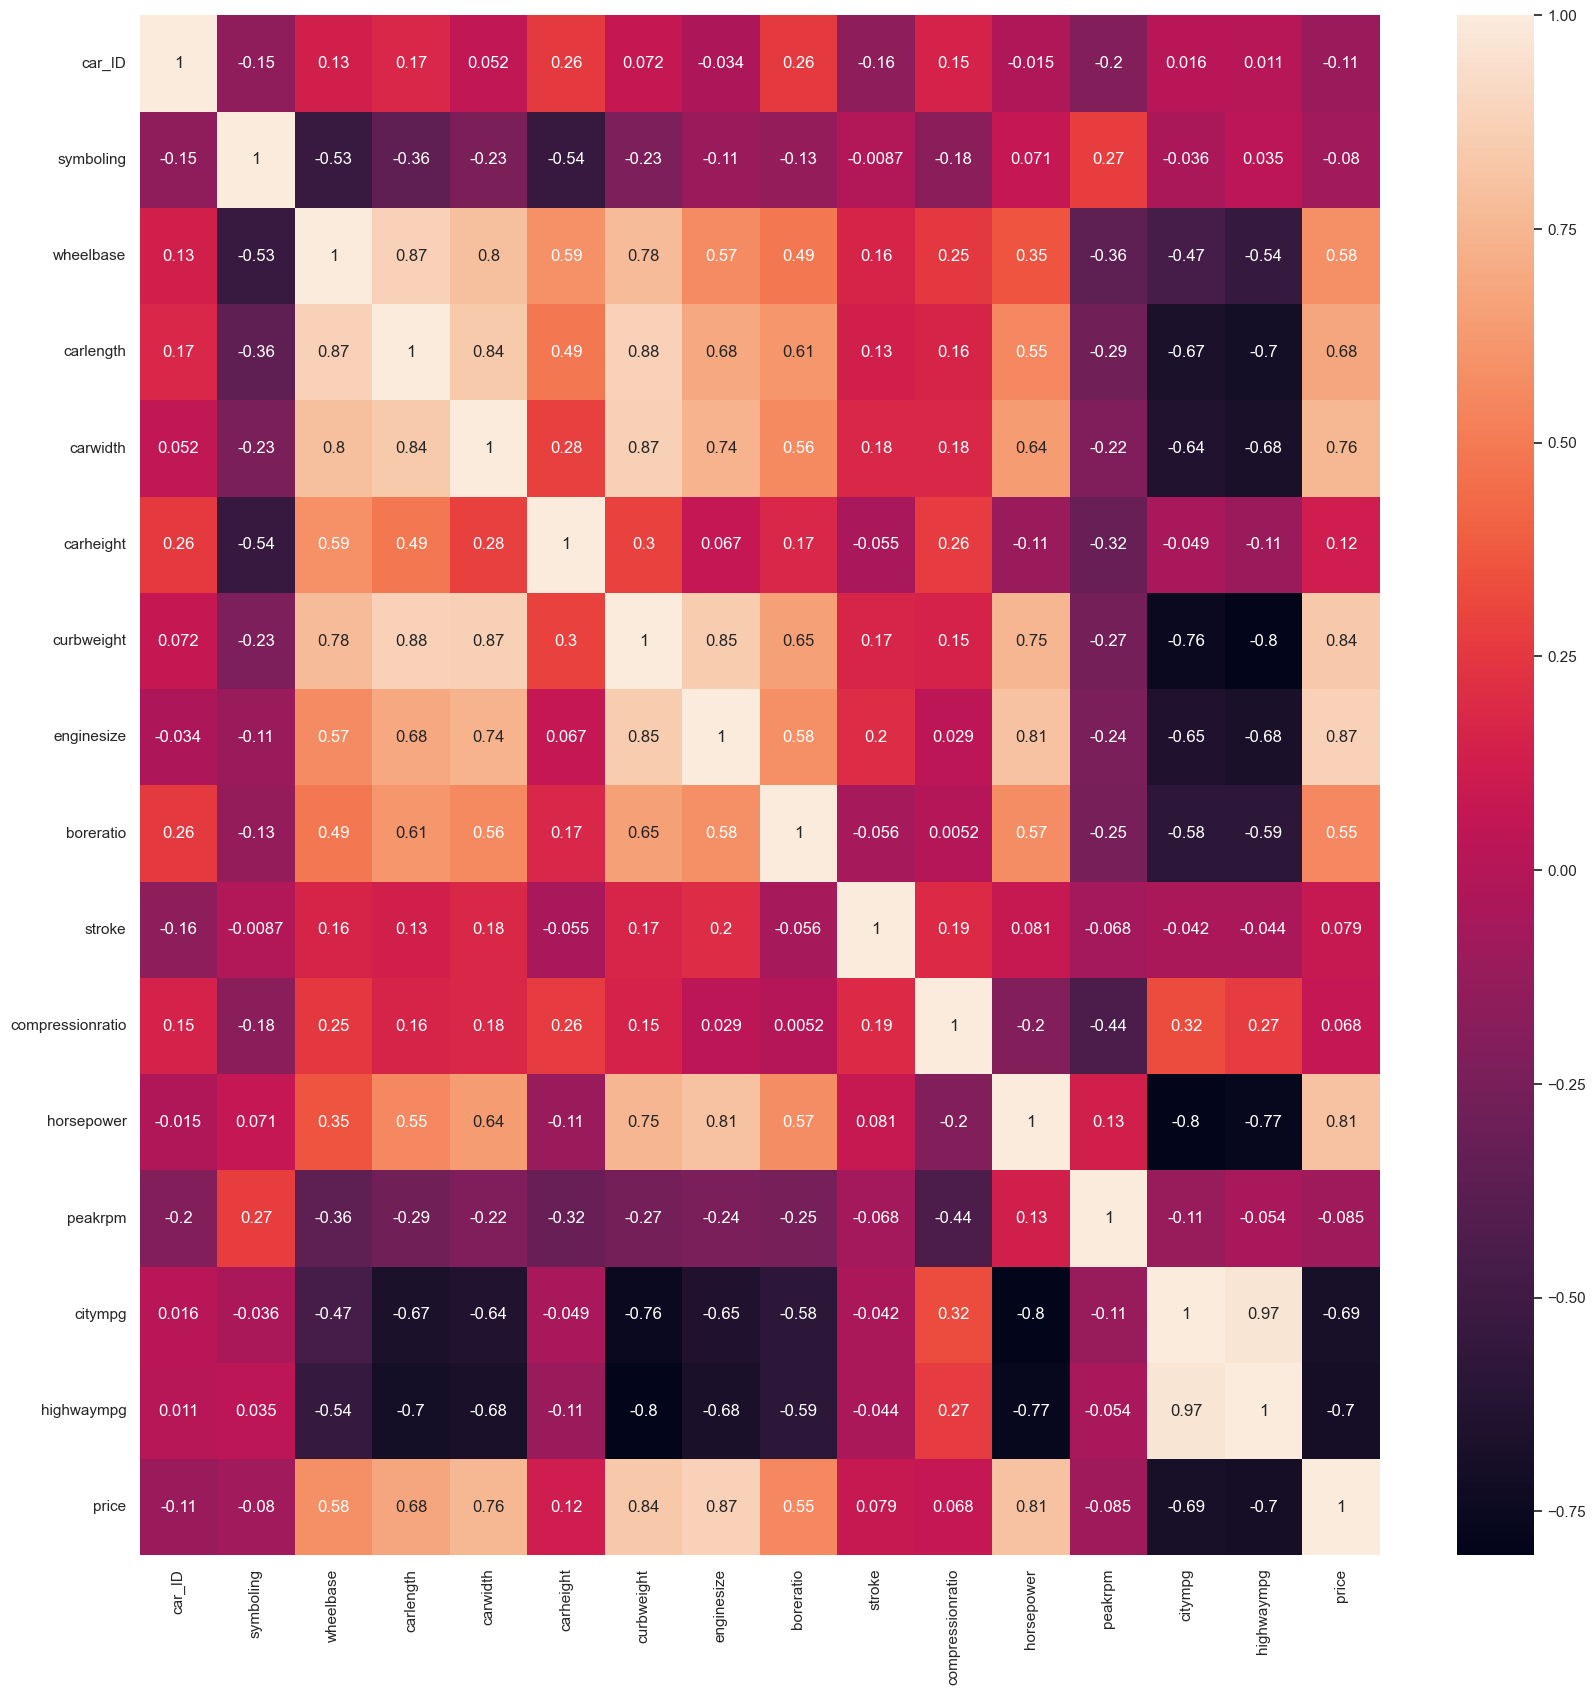

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() , annot=True);

In [15]:
df.CarName.value_counts()

toyota_corona           6
toyota_corolla          6
peugeot_504             6
subaru_dl               4
mitsubishi_mirage_g4    3
                       ..
mazda_glc_4             1
mazda_rx2_coupe         1
maxda_glc_deluxe        1
maxda_rx3               1
volvo_246               1
Name: CarName, Length: 147, dtype: int64

In [16]:
df.groupby('CarName').mean()['price']

CarName
alfa_romero_giulia          13495.0
alfa_romero_quadrifoglio    16500.0
alfa_romero_stelvio         16500.0
audi_100_ls                 13950.0
audi_100ls                  17580.0
                             ...   
volvo_246                   22470.0
volvo_264gl                 20522.5
volvo_diesel                18950.0
vw_dasher                   11595.0
vw_rabbit                    9980.0
Name: price, Length: 147, dtype: float64

In [17]:
df[df['horsepower']<=100]['price'].mean()

8766.67256637168

In [18]:
df[df['horsepower']>=100]['price'].mean()

18632.251776595742

In [19]:
df_dup=df.duplicated().any()
df_dup

False

In [20]:
df.groupby('curbweight')['price'].mean()

curbweight
1488     5151.00
1713     6479.00
1819     6855.00
1837     5399.00
1874     7605.75
          ...   
3750    28248.00
3770    31600.00
3900    40960.00
3950    36000.00
4066    33900.00
Name: price, Length: 171, dtype: float64

In [21]:
# Make all the strings in the same format
string_columns=list(df.dtypes[df.dtypes=='object'].index)
for col in string_columns:
    df[col]=df[col].str.lower().str.replace(' ','_')
    df[col]=df[col].str.lower().str.replace('-','_')

<AxesSubplot:xlabel='price', ylabel='Count'>

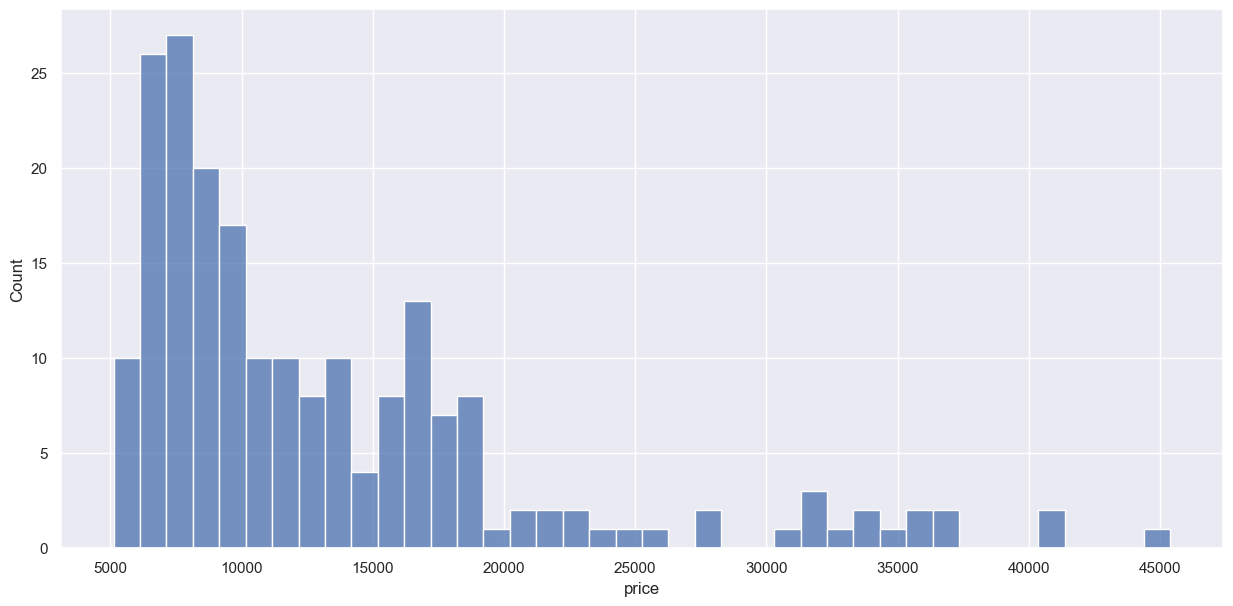

In [22]:
plt.figure(figsize=(15,7))
sns.histplot(df.price,bins=40)

In [23]:
df.price.skew()

1.7776781560914454

In [24]:
string_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

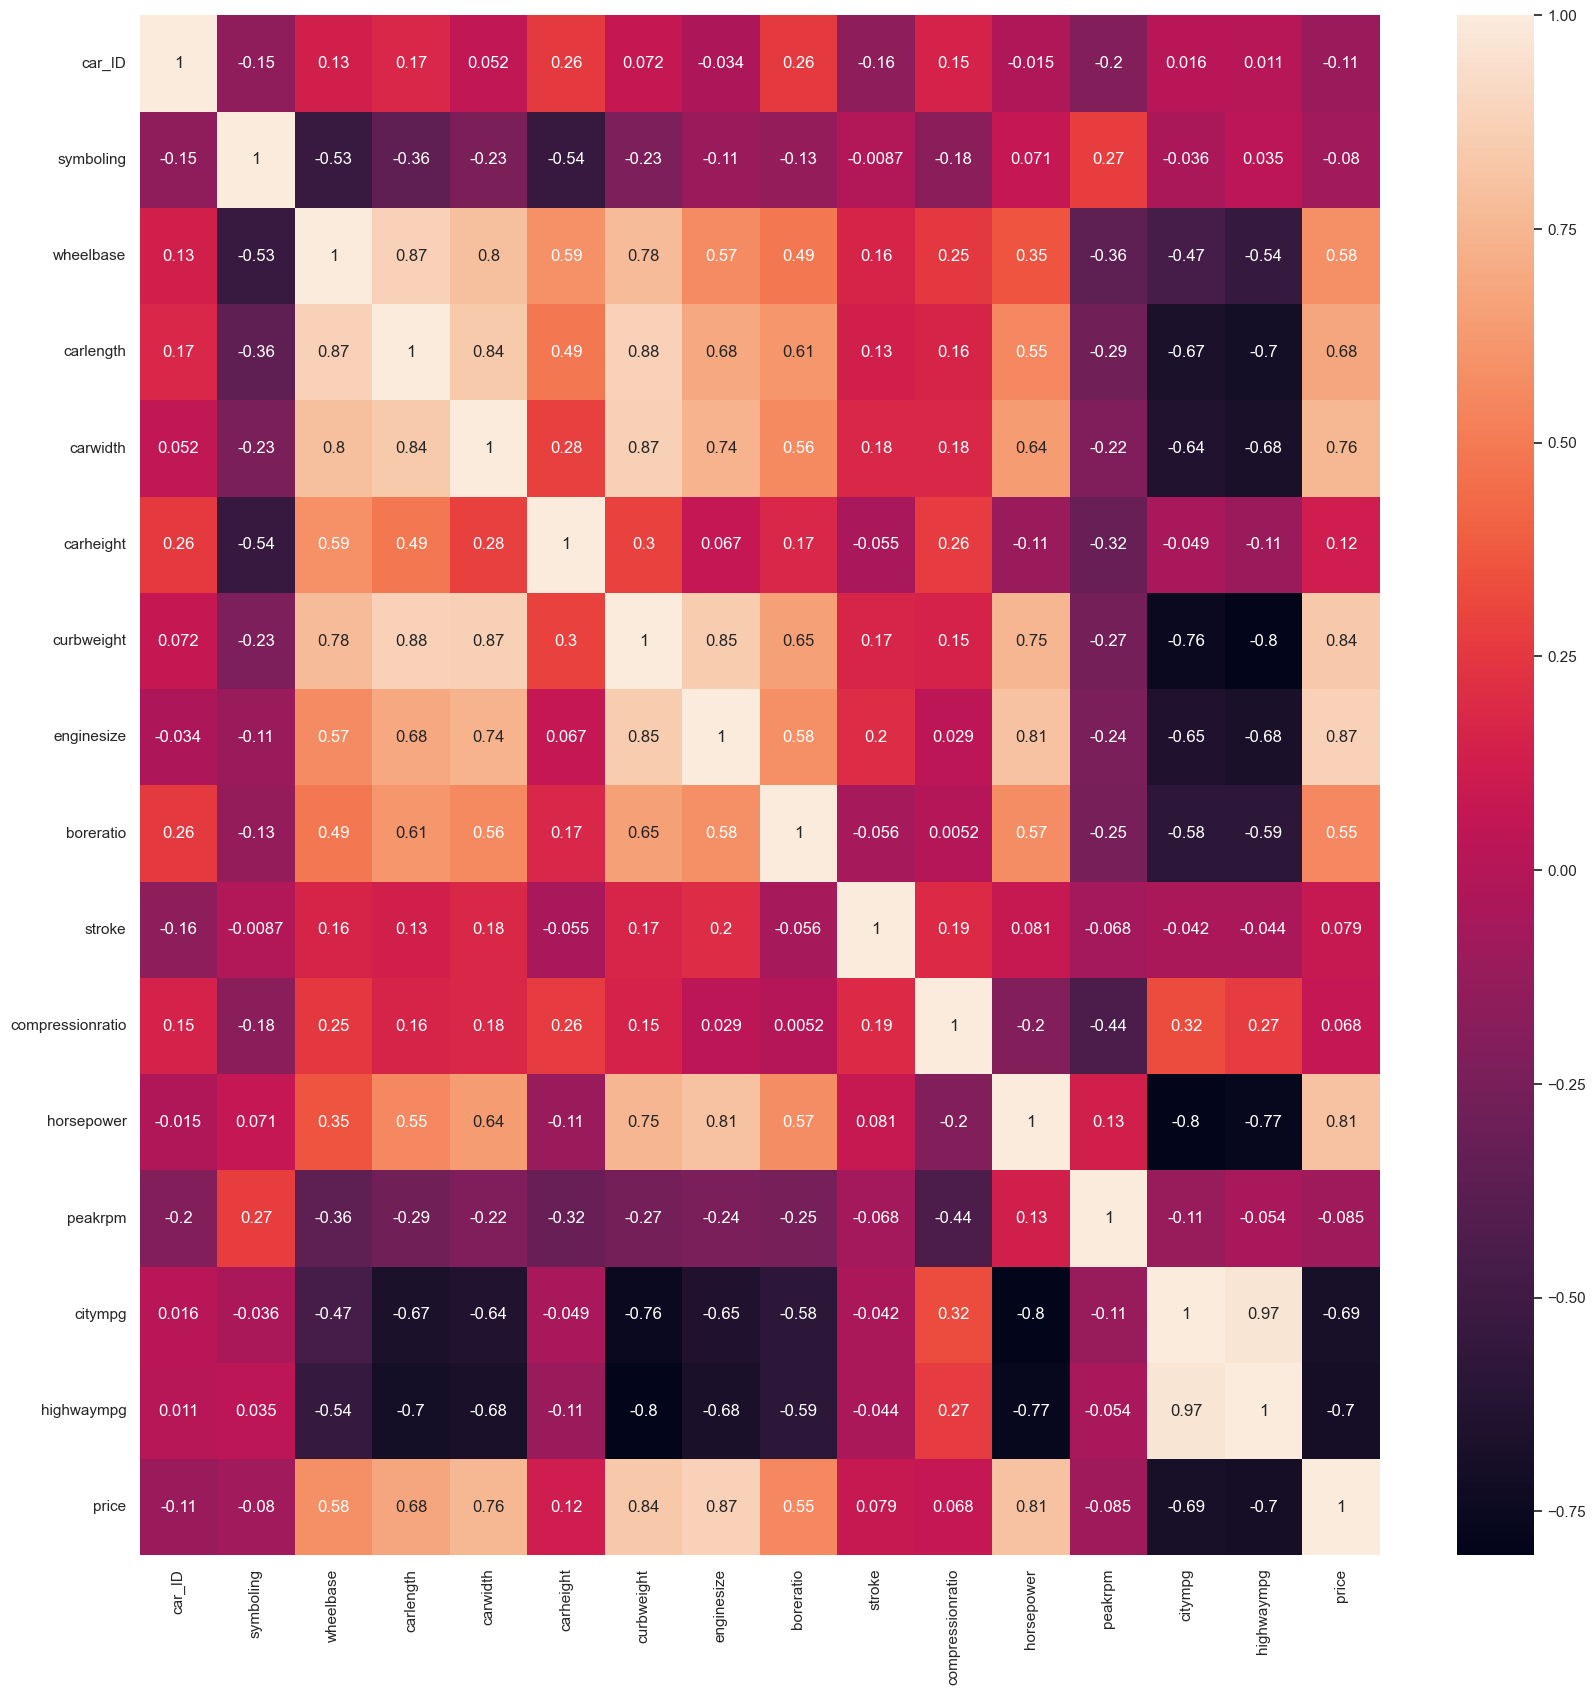

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() , annot=True);

In [26]:
df.CarName.value_counts()

toyota_corona           6
toyota_corolla          6
peugeot_504             6
subaru_dl               4
mitsubishi_mirage_g4    3
                       ..
mazda_glc_4             1
mazda_rx2_coupe         1
maxda_glc_deluxe        1
maxda_rx3               1
volvo_246               1
Name: CarName, Length: 147, dtype: int64

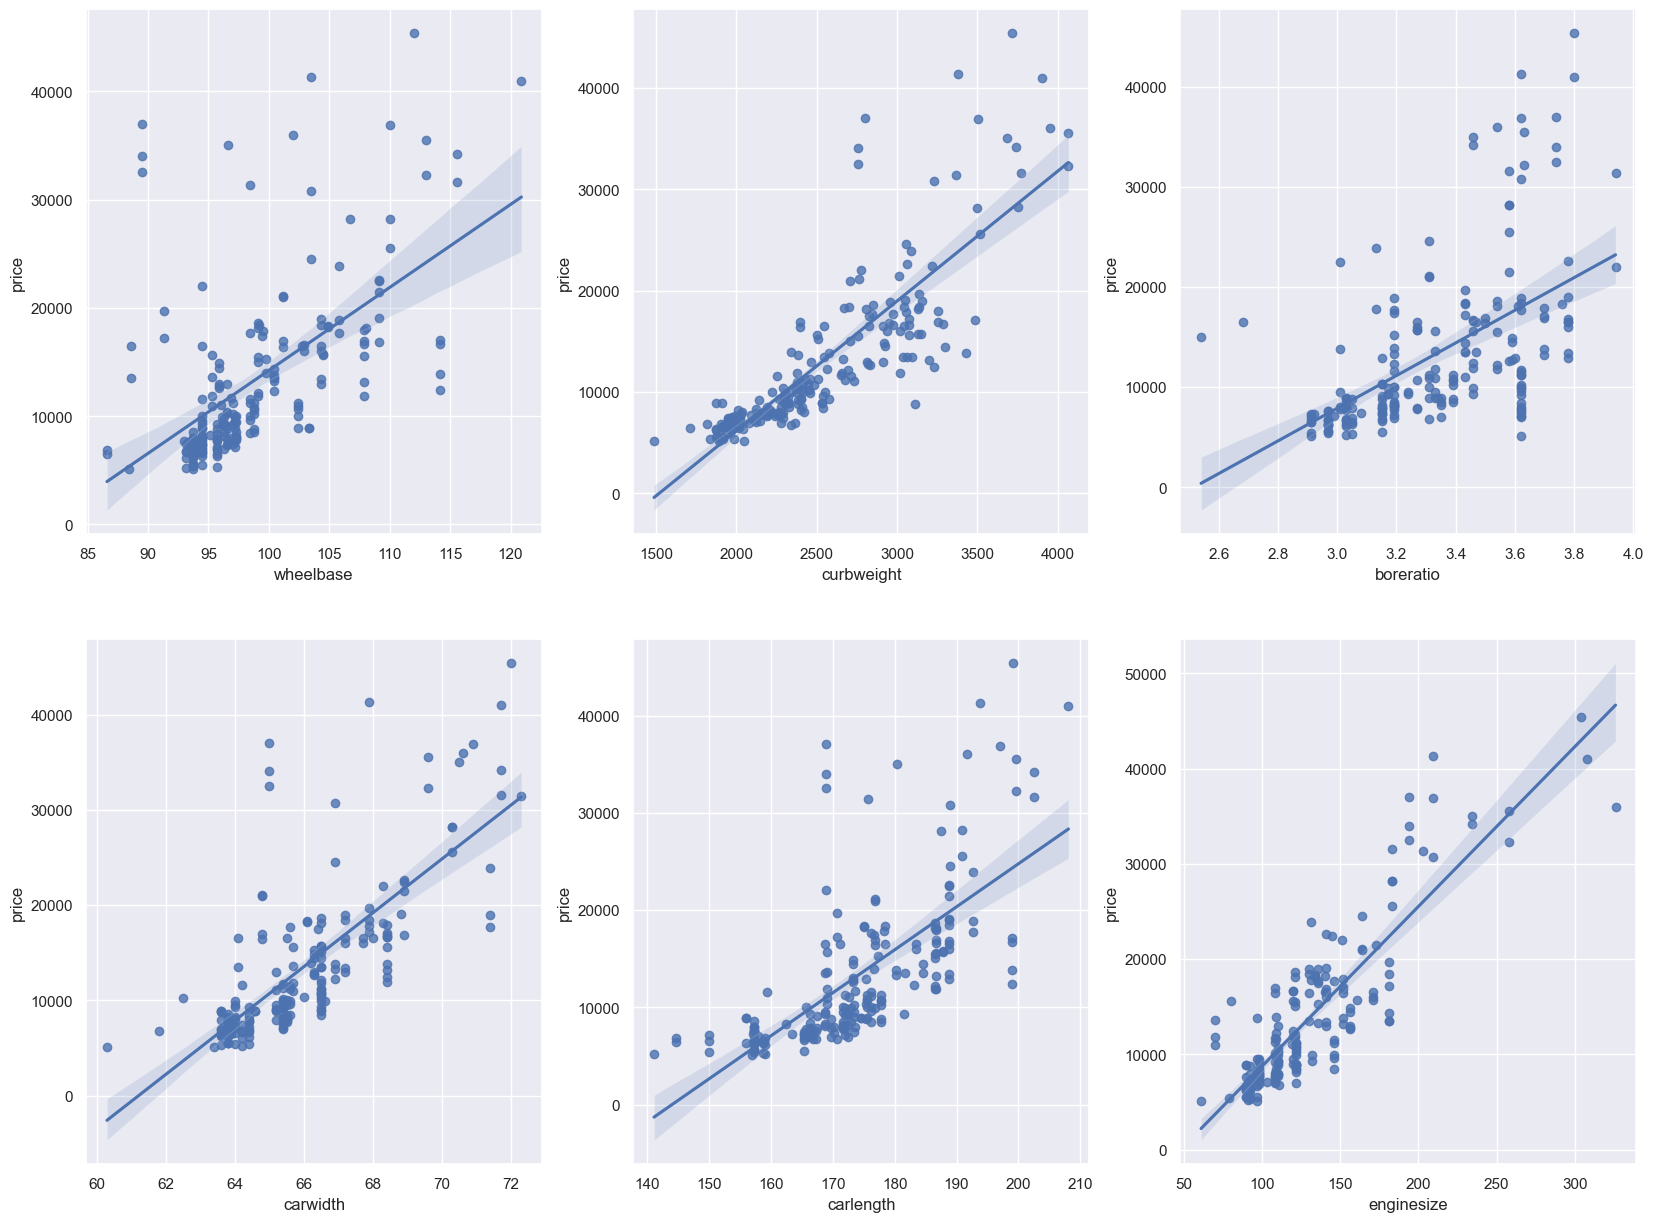

In [27]:
columns=['wheelbase','curbweight','boreratio','carwidth','carlength','enginesize']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'price', data = df)
plt.show()

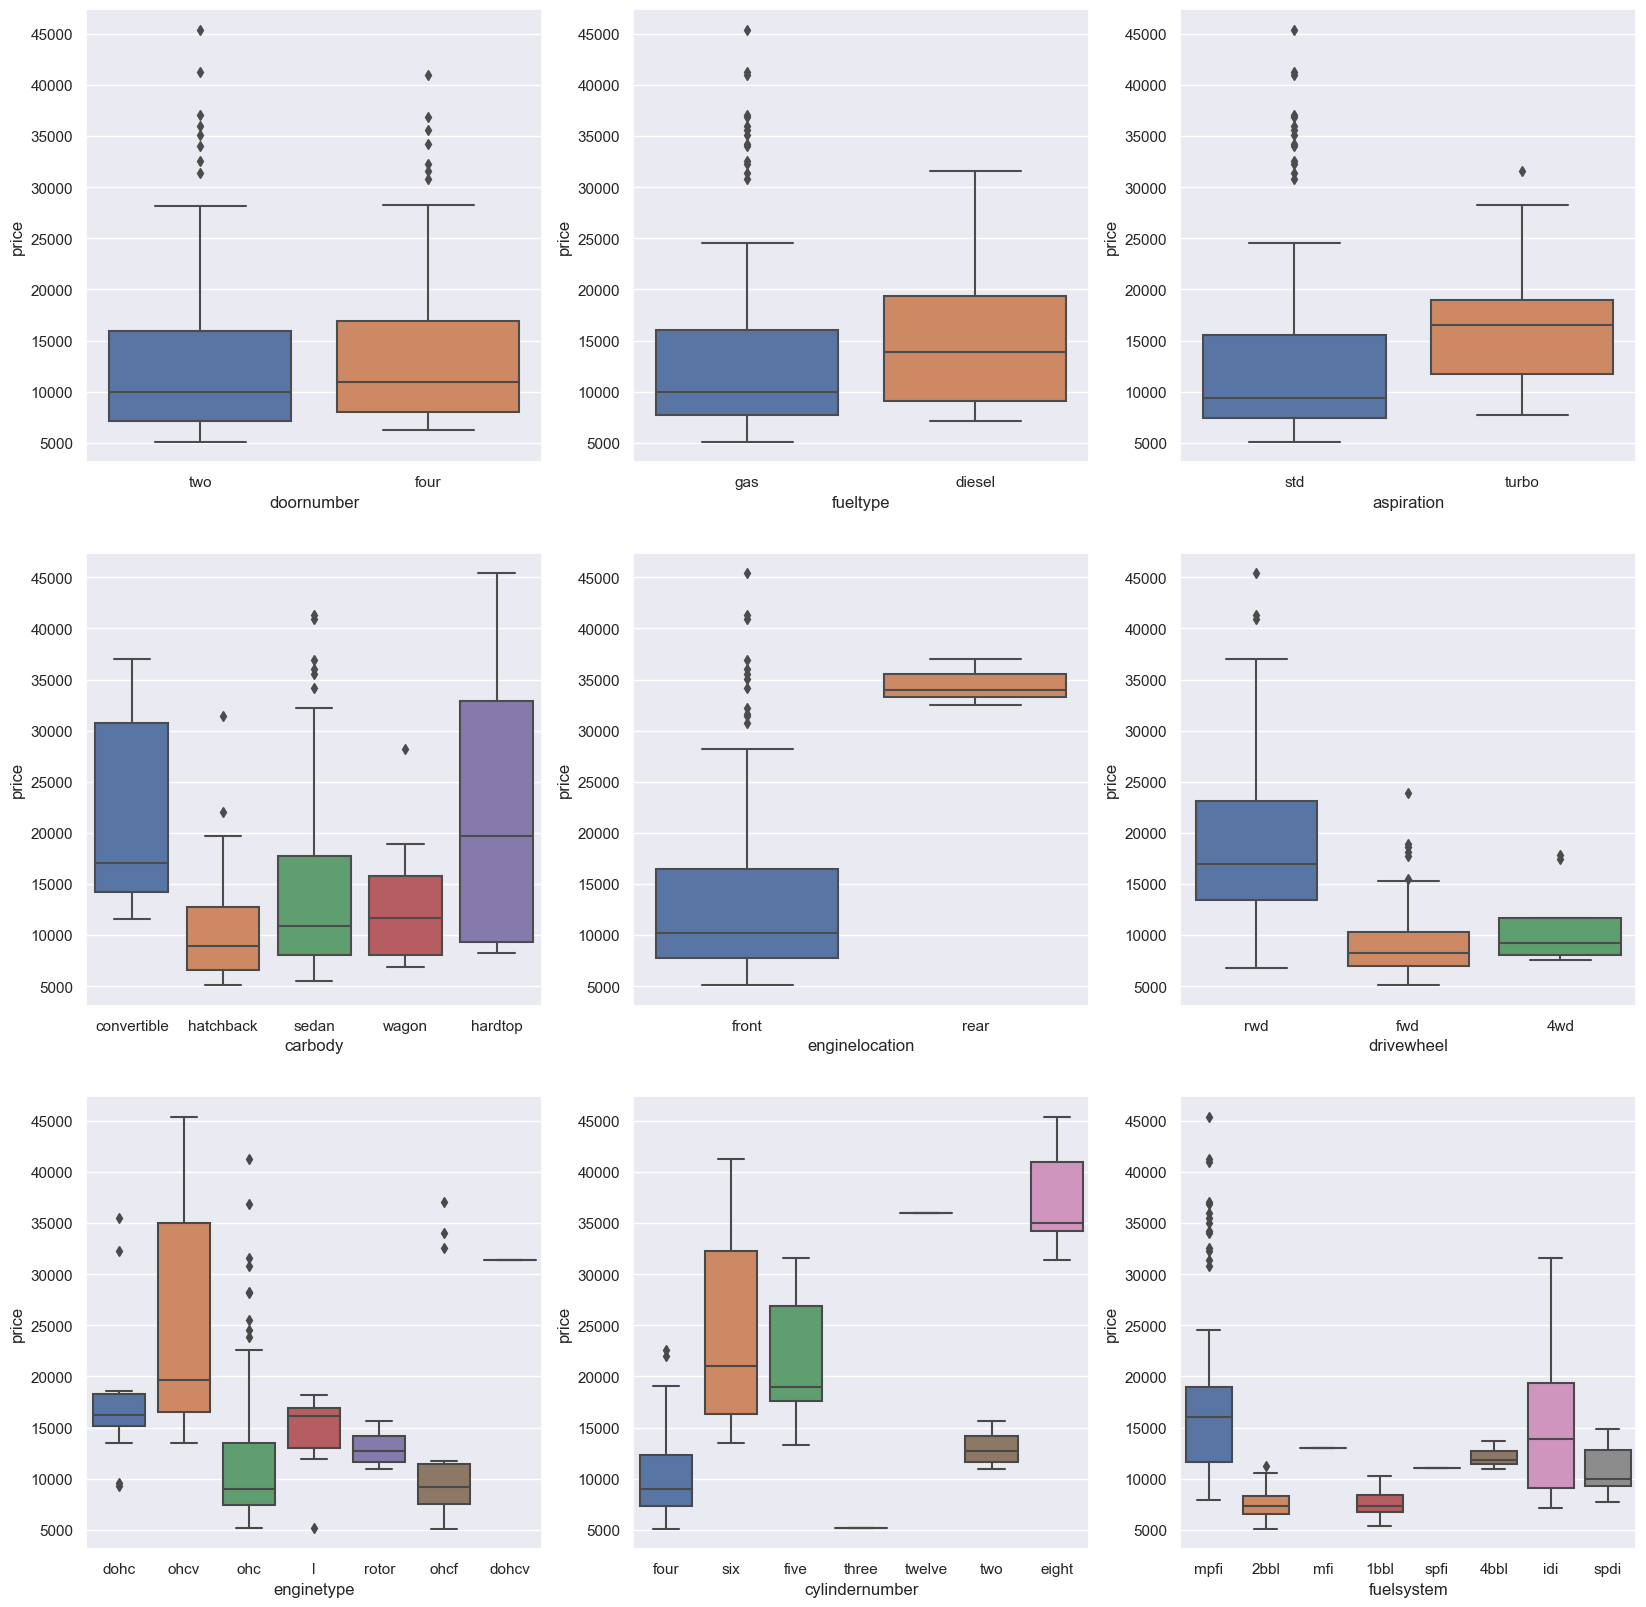

In [28]:
plt.figure(figsize=(20, 20))
columns=['doornumber','fueltype','aspiration','carbody','enginelocation','drivewheel','enginetype','cylindernumber','fuelsystem']
i=0
for col in columns:
    i=i+1
    plt.subplot(3,3,i)
    sns.boxplot(x = col, y = 'price', data = df)
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

fueltype_le=LabelEncoder()
df['fueltype']= fueltype_le.fit_transform(df.fueltype)
enginelocation_le=LabelEncoder()
df['enginelocation']=enginelocation_le.fit_transform(df.enginelocation)
cylindernumber_le=LabelEncoder()
df['cylindernumber']=cylindernumber_le.fit_transform(df.cylindernumber)
enginetype_le=LabelEncoder()
df['enginetype']=enginetype_le.fit_transform(df.enginetype)
carbody_le=LabelEncoder()
df['carbody']=carbody_le.fit_transform(df.carbody)
aspiration_le=LabelEncoder()
df['aspiration']=aspiration_le.fit_transform(df.aspiration)

In [30]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [31]:
X=df.drop(["car_ID","CarName","doornumber","drivewheel","enginelocation","fuelsystem","symboling",
           'compressionratio','peakrpm','citympg','highwaympg','carheight','stroke'],axis=1)
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,shuffle=True,random_state = 8)

In [32]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [33]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [34]:
X_train

array([[ 0.30265996, -0.42640143, -0.78037595, ..., -1.03126731,
        -1.0233017 , -0.87167173],
       [ 0.30265996, -0.42640143,  0.44592911, ...,  0.58574174,
        -0.11339201,  0.32553301],
       [ 0.30265996, -0.42640143,  0.44592911, ...,  1.5918807 ,
         0.18991122,  0.37476408],
       ...,
       [ 0.30265996,  2.34520788, -0.78037595, ...,  0.334207  ,
         2.19637874,  0.71333149],
       [ 0.30265996,  2.34520788, -0.78037595, ...,  0.90914355,
         0.91317277,  0.09527395],
       [ 0.30265996, -0.42640143,  1.67223417, ...,  1.5918807 ,
         0.18991122, -0.03213369]])

In [35]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (143, 13)
X_test shape: (62, 13)
y_train shape: (143,)
y_test shape: (62,)


In [36]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred= model.predict(X_test)
pd.DataFrame({'test':y_test,'pred':y_pred}).head()

,test,pred
65,18280.0,21173.650000
141,7126.0,7129.842061
194,12940.0,14450.148619
204,22625.0,26644.364138
188,9995.0,10742.150199


In [38]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f" RMSE: {mean_squared_error(y_test, y_pred)}")

MAE: 1398.8596117730008
 RMSE: 4839041.454967937


In [39]:
model.score(X_test,y_test)

0.8920431518162439

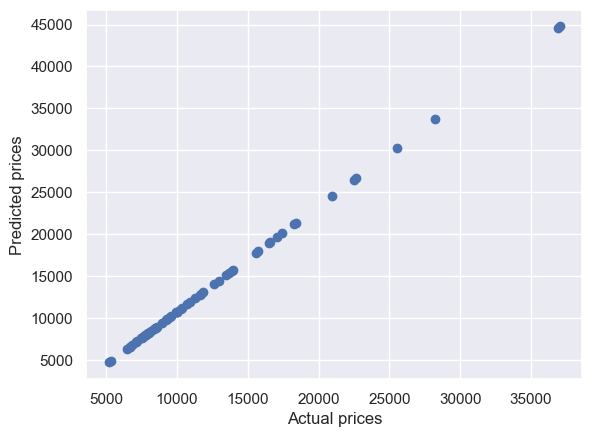

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.show()

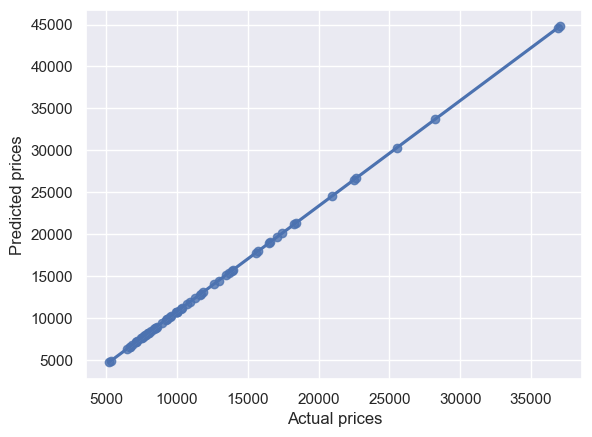

In [41]:
import seaborn as sns

sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.show()